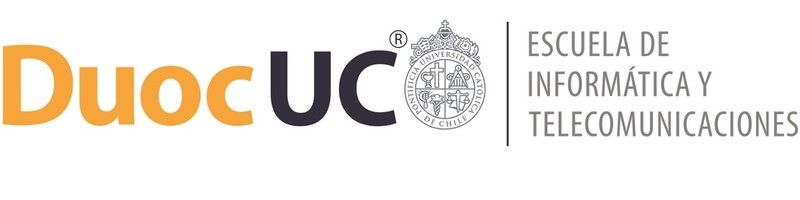

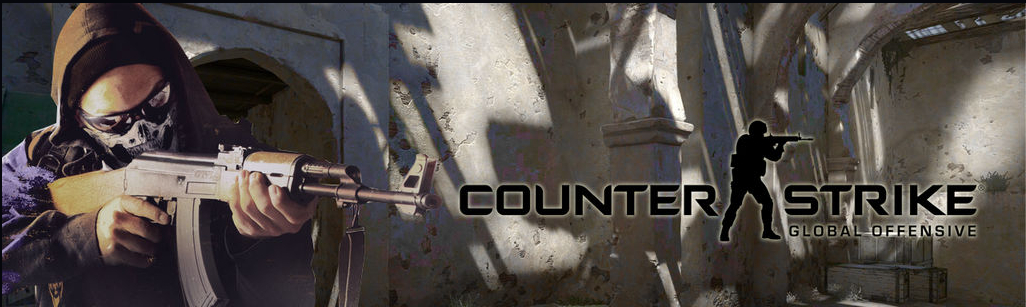

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: Sebastián Carrera, Yasna villarroel y Kevin Vivanco

Docente: Giocrisrai Godoy    

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

## Objetivo del proyecto

El objetivo de este proyecto es analizar los datos de las partidas del videojuego Counter Strike: GO con el fin de afirmar o descartar las hipótesis planteadas a continuación.

#Obj de clasificación global

1.3.1 Clasificación: ¿Se puede predecir si un jugador sobrevivirá la ronda?
Descripción:

Desarrollar un modelo de clasificación que, utilizando variables del desempeño del jugador y el contexto de la ronda, prediga si un jugador sobrevivirá o no la ronda.
Variables relevantes:

🔹 Survived: Sobrevivencia en la ronda.
🔹 RoundKills: Cantidad de enemigos eliminados por el jugador en la ronda.
🔹 RoundHeadshots: Cantidad de tiros a la cabeza realizados por el jugador en la ronda.
🔹 RoundStartingEquipmentValue: Valor del equipamiento del jugador al inicio de la ronda.
Hipótesis:

"La probabilidad de que un jugador sobreviva una ronda depende del valor de su equipamiento inicial y de su capacidad para eliminar enemigos durante la ronda."


## Fase 2: Data Understanding

In [1]:
# 📦 Importaciones necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from google.colab import files

In [2]:


uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

# Leer el CSV usando punto y coma como separador
df = pd.read_csv(name, sep=";")


Saving csgo_datos_corregidos.csv to csgo_datos_corregidos.csv


#mapa de correlacion

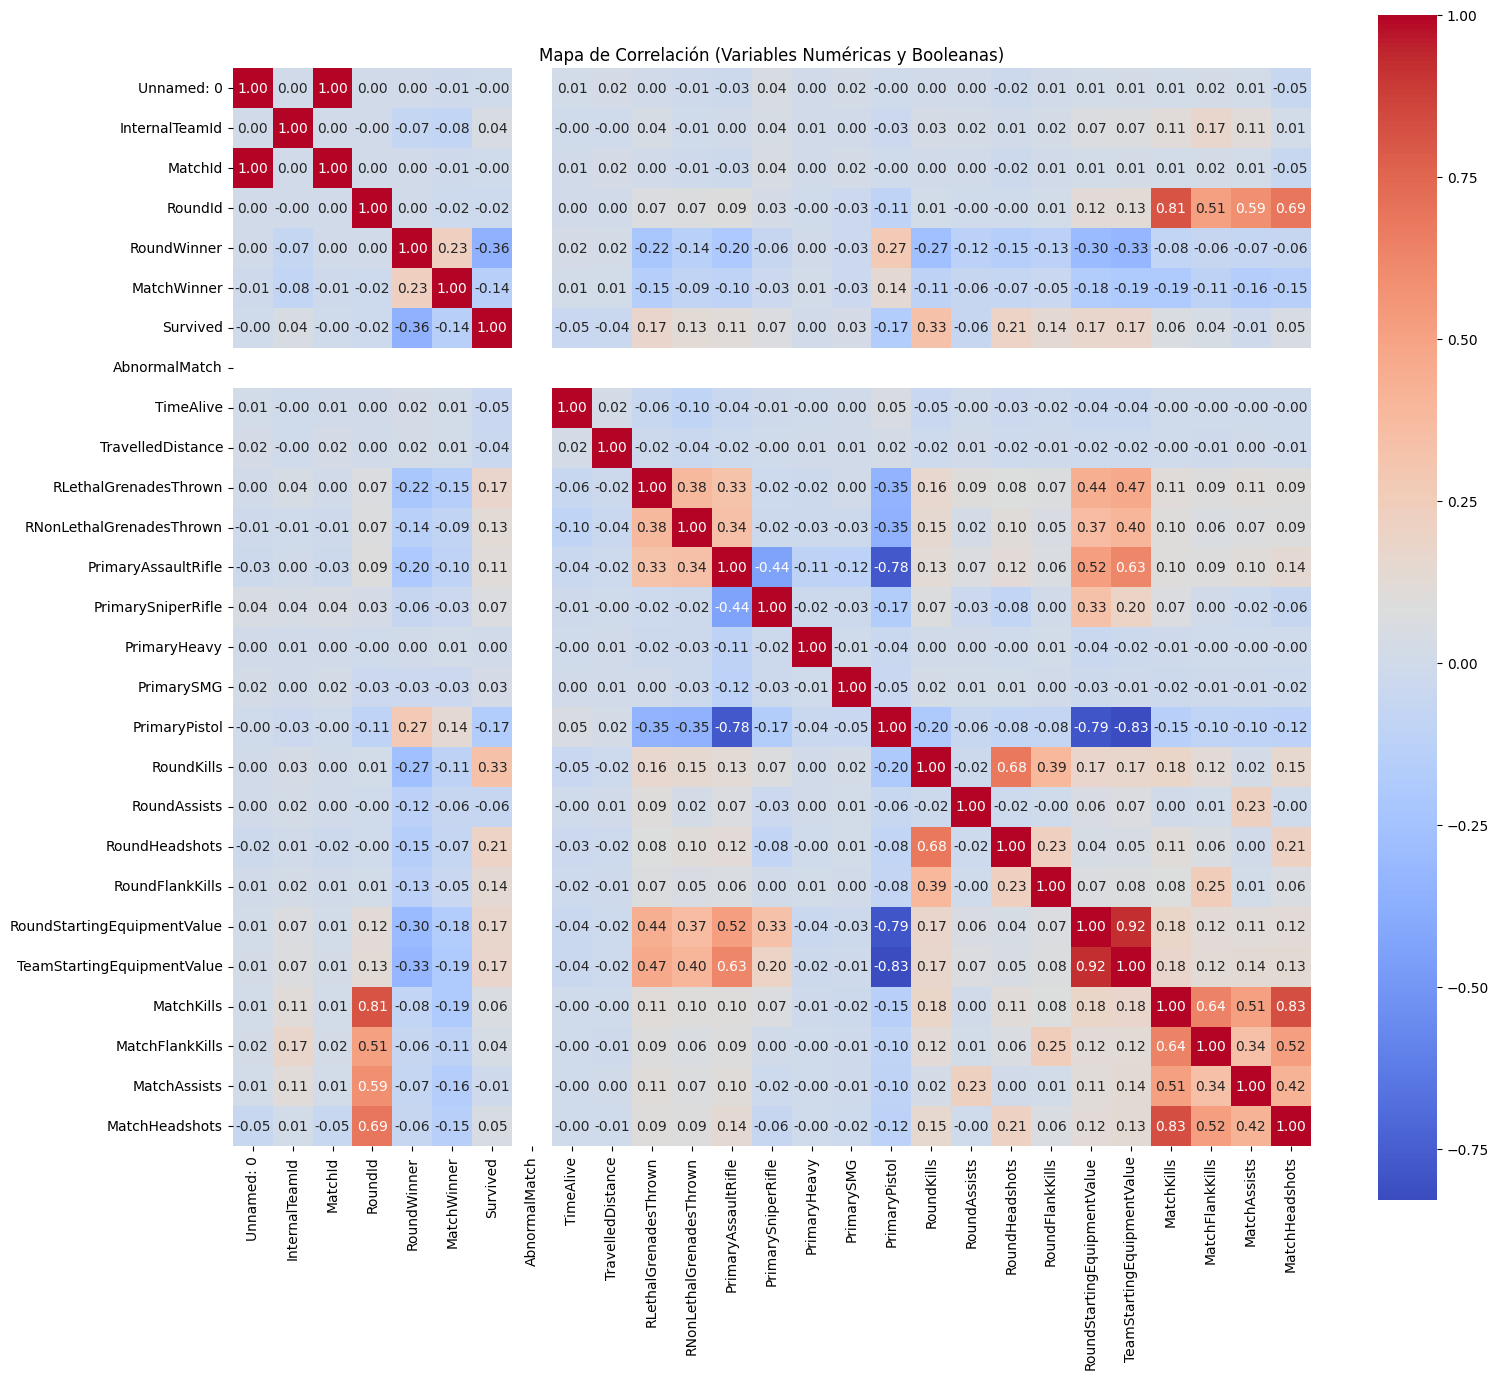

In [ ]:

# Seleccionar variables numéricas y booleanas
numeric_df = df.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación completa
correlation_matrix = numeric_df.corr()

# Generar mapa de calor completo
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Mapa de Correlación (Variables Numéricas y Booleanas)")
plt.tight_layout()
plt.show()


In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Extraemos la correlación con la variable objetivo
target_corr = correlation_matrix['Survived'].drop('Survived')

# Filtramos las variables con correlación absoluta mayor a un umbral
relevant_features = target_corr[abs(target_corr) > 0.1].index.tolist()

# Incluimos también la variable objetivo
relevant_features.append('Survived')

# Creamos el nuevo DataFrame filtrado
df_corr = df[relevant_features]

print(f"Variables seleccionadas: {relevant_features}")
df_corr.head()

Variables seleccionadas: ['RoundWinner', 'MatchWinner', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimaryPistol', 'RoundKills', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'Survived']


,RoundWinner,MatchWinner,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimaryPistol,RoundKills,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,Survived
0,False,True,0,4,0.0,1,0,0,0,750,4400,False
1,False,True,0,0,0.0,1,0,0,0,800,4400,False
2,False,True,0,0,0.0,1,0,0,0,1000,4400,False
3,False,True,0,0,0.0,1,0,0,0,850,4400,False
4,False,True,1,1,0.0,1,0,0,0,1000,4400,True


Variables relevantes


RoundWinner, MatchWinner, RLethalGrenadesThrown, RNonLethalGrenadesThrown,
PrimaryAssaultRifle, PrimaryPistol, RoundKills, RoundHeadshots, Survived, RoundFlankKills, RoundStartingEquipmentValue, TeamStartingEquipmentValue

In [3]:

# ✅ Selección inicial de variables
selected_features = [
    'RoundWinner',
    'MatchWinner',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'PrimaryAssaultRifle',
    'PrimaryPistol',
    'RoundKills',
    'RoundHeadshots',
    'RoundFlankKills',
    'RoundStartingEquipmentValue',
    'TeamStartingEquipmentValue',
    'Survived',
    'TimeAlive',
    'RoundId'
]

# 📤 Crear DataFrame base
df_corr = df[selected_features].copy()

# 🧹 Eliminar por colinealidad
df_corr = df_corr.drop(columns=['TeamStartingEquipmentValue'])

# 📊 Variables derivadas
df_corr['HeadshotRate'] = df_corr['RoundHeadshots'] / (df_corr['RoundKills'] + 1)
df_corr['FlankRate'] = df_corr['RoundFlankKills'] / (df_corr['RoundKills'] + 1)
df_corr['KillEfficiency'] = df_corr['RoundKills'] / (df_corr['RLethalGrenadesThrown'] + df_corr['RNonLethalGrenadesThrown'] + 1)
df_corr['AggressionScore'] = df_corr['RoundKills'] + 0.5 * df_corr['RoundHeadshots'] + 0.3 * df_corr['RoundFlankKills']
df_corr['EngagementCount'] = df_corr['RoundKills'] + df_corr['RoundHeadshots'] + df_corr['RoundFlankKills']
df_corr['EquipmentPerKill'] = df_corr['RoundStartingEquipmentValue'] / (df_corr['RoundKills'] + 1)
df_corr['CombinedGrenades'] = df_corr['RLethalGrenadesThrown'] + df_corr['RNonLethalGrenadesThrown']
df_corr['AggroRatio'] = df_corr['RoundKills'] / (df_corr['TimeAlive'] + 1)
df_corr['KillPerUtility'] = df_corr['RoundKills'] / (df_corr['CombinedGrenades'] + 1)
df_corr['UtilityHeaviness'] = df_corr['RNonLethalGrenadesThrown'] / (df_corr['CombinedGrenades'] + 1)
df_corr['HasRifle'] = (df_corr['PrimaryAssaultRifle'] == 1).astype(int)
df_corr['AggroKillRatio'] = df_corr['RoundKills'] / (df_corr['EngagementCount'] + 1)

# 🎯 Categoría económica
df_corr['EconomicStatus'] = pd.cut(
    df_corr['RoundStartingEquipmentValue'],
    bins=[0, 1000, 3000, 6000],
    labels=['Eco', 'Force', 'Full']
)

# ❌ Variables redundantes a eliminar
cols_to_drop = [
    'MatchWinner',
    'RoundHeadshots',
    'PrimaryAssaultRifle',
    'RoundFlankKills',
    'RNonLethalGrenadesThrown',
    'AggressionScore',  # ya está reflejado en otras métricas
    'TimeAlive',         # absorbida por AggroRatio e IsClutchRound
    'RoundId'            # absorbido en IsClutchRound
]

df_corr = df_corr.drop(columns=cols_to_drop)


In [ ]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   RoundWinner                  79157 non-null  bool    
 1   RLethalGrenadesThrown        79157 non-null  int64   
 2   PrimaryPistol                79157 non-null  int64   
 3   RoundKills                   79157 non-null  int64   
 4   RoundStartingEquipmentValue  79157 non-null  int64   
 5   Survived                     79157 non-null  bool    
 6   HeadshotRate                 79157 non-null  float64 
 7   FlankRate                    79157 non-null  float64 
 8   KillEfficiency               79157 non-null  float64 
 9   EngagementCount              79157 non-null  int64   
 10  EquipmentPerKill             79157 non-null  float64 
 11  CombinedGrenades             79157 non-null  int64   
 12  AggroRatio                   79157 non-null  float64 
 13  K

/tmp/ipython-input-7-3915071054.py:5: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


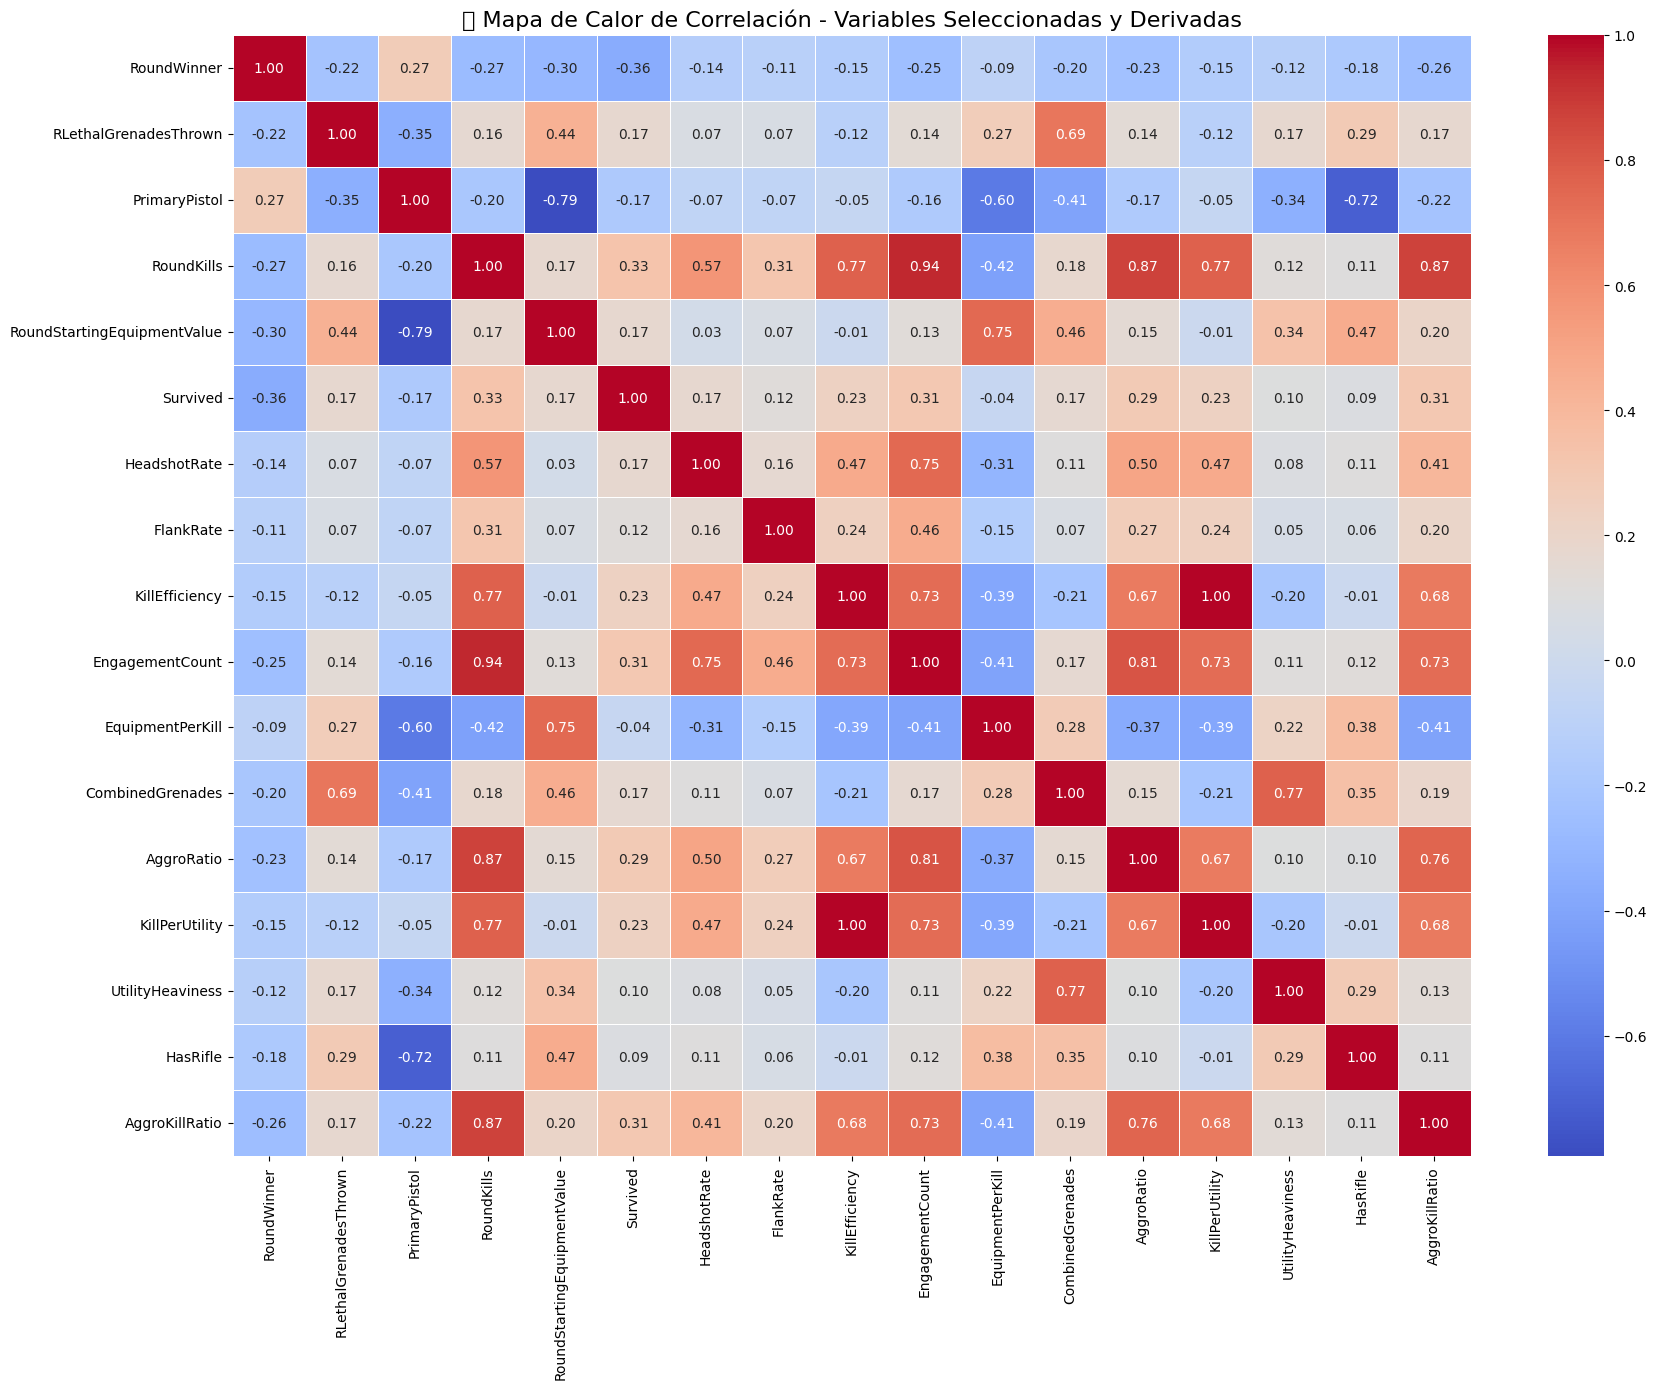

In [ ]:
# 🎨 Mapa de correlación
plt.figure(figsize=(18, 14))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("🔥 Mapa de Calor de Correlación - Variables Seleccionadas y Derivadas", fontsize=16)
plt.tight_layout()
plt.show()

#Modelo XGBOOST



#Ejecución del modelo

#Prueba 1

In [ ]:
# 🎯 Variables predictoras y objetivo correctas
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived'].astype(int)

# 🔤 Codificación de la variable categórica
cat_features = ['EconomicStatus']
num_features = [col for col in X.columns if col not in cat_features]

# 🏗️ Preprocesamiento
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), cat_features)
], remainder='passthrough')

# 🧠 Modelo XGBoost
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# 🔄 Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', model)
])

# 🔀 Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# 🚀 Entrenar modelo
pipeline.fit(X_train, y_train)

# 📈 Predicciones
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# 📊 Evaluaciones
print("📊 Accuracy:", pipeline.score(X_test, y_test))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_prob))

📊 Accuracy: 0.7296914478217594

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     15581
           1       0.67      0.64      0.66     10541

    accuracy                           0.73     26122
   macro avg       0.72      0.72      0.72     26122
weighted avg       0.73      0.73      0.73     26122


🧱 Confusion Matrix:
 [[12285  3296]
 [ 3765  6776]]

🔢 ROC AUC: 0.7873254937531068


#Eliminación de variables

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:11:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                        Feature  Importance
0                   RoundWinner    0.513734
2                 PrimaryPistol    0.227756
3                    RoundKills    0.062422
11                   AggroRatio    0.032198
16               EconomicStatus    0.019892
9              EquipmentPerKill    0.019785
1         RLethalGrenadesThrown    0.016876
7                KillEfficiency    0.016248
4   RoundStartingEquipmentValue    0.013870
10             CombinedGrenades    0.013622
15               AggroKillRatio    0.013445
14                     HasRifle    0.013444
13             UtilityHeaviness    0.010302
6                     FlankRate    0.008841
8               EngagementCount    0.008816
5                  HeadshotRate    0.008750
12               KillPerUtility    0.000000


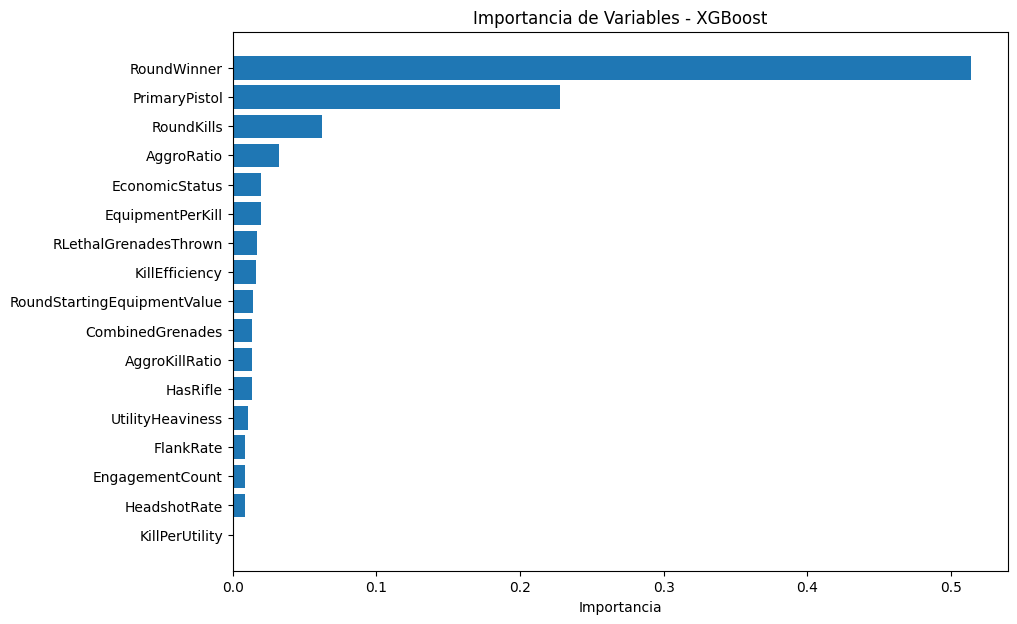

In [4]:
# Reemplaza con tu DataFrame si es distinto
df_corr = df_corr.copy()

# Transformar columna categórica 'EconomicStatus' a numérica
le = LabelEncoder()
df_corr['EconomicStatus'] = df_corr['EconomicStatus'].astype(str)  # Asegura que no haya 'NaN' categóricos
df_corr['EconomicStatus'] = le.fit_transform(df_corr['EconomicStatus'])

# ✅ Corregido (predice si el jugador sobrevivió la ronda)
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived'].astype(int)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Entrenar modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Obtener importancias
importances = model.feature_importances_
features = X.columns

# Crear DataFrame de importancias
df_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
df_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Mostrar tabla
print(df_importance)

# 📊 Gráfico de importancias
plt.figure(figsize=(10, 7))
plt.barh(df_importance['Feature'], df_importance['Importance'])
plt.gca().invert_yaxis()
plt.title("Importancia de Variables - XGBoost")
plt.xlabel("Importancia")
plt.show()

In [5]:
# 📌 Lista de variables irrelevantes (baja importancia según XGBoost)
irrelevantes = [
    'KillPerUtility',
    'HeadshotRate',
    'AggroKillRatio',
    'HasRifle',
    'UtilityHeaviness',
    'CombinedGrenades',
    'AggroRatio',
    'EngagementCount',
    'FlankRate',
    'EquipmentPerKill',
    'RLethalGrenadesThrown',
    'KillEfficiency'
]

# 🧹 Eliminar variables irrelevantes del DataFrame
df_corr = df_corr.drop(columns=irrelevantes)

# ✔️ Mostrar columnas finales
print("Variables finales en df_corr:", df_corr.columns.tolist())

Variables finales en df_corr: ['RoundWinner', 'PrimaryPistol', 'RoundKills', 'RoundStartingEquipmentValue', 'Survived', 'EconomicStatus']


In [6]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   RoundWinner                  79157 non-null  bool 
 1   PrimaryPistol                79157 non-null  int64
 2   RoundKills                   79157 non-null  int64
 3   RoundStartingEquipmentValue  79157 non-null  int64
 4   Survived                     79157 non-null  bool 
 5   EconomicStatus               79157 non-null  int64
dtypes: bool(2), int64(4)
memory usage: 2.6 MB


📊 Accuracy: 0.719967843197305

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77     15581
           1       0.65      0.65      0.65     10541

    accuracy                           0.72     26122
   macro avg       0.71      0.71      0.71     26122
weighted avg       0.72      0.72      0.72     26122


🧱 Confusion Matrix:
 [[11952  3629]
 [ 3686  6855]]

🔢 ROC AUC: 0.7721065681950793


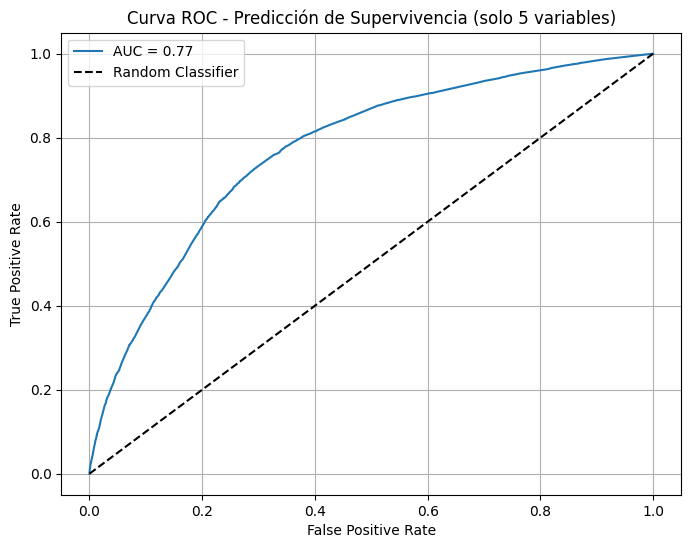

In [ ]:


# 🧹 Convertir booleanos a enteros (XGBoost requiere int o float)
df_corr['RoundWinner'] = df_corr['RoundWinner'].astype(int)
df_corr['Survived'] = df_corr['Survived'].astype(int)

# 🎯 Definir X y y
X = df_corr[['RoundWinner', 'PrimaryPistol', 'RoundKills', 'RoundStartingEquipmentValue', 'EconomicStatus']]
y = df_corr['Survived']

# 🔀 División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 🤖 Modelo XGBoost sin parámetro obsoleto
model = xgb.XGBClassifier(
    eval_metric='logloss',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# 🔮 Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 📊 Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# 📈 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Predicción de Supervivencia (solo 5 variables)")
plt.legend()
plt.grid(True)
plt.show()


#GRIDSEARCH

In [7]:
# 🎯 Definimos nuevamente X e y (por si no están en memoria)
X = df_corr[['RoundWinner', 'PrimaryPistol', 'RoundKills', 'RoundStartingEquipmentValue', 'EconomicStatus']]
y = df_corr['Survived'].astype(int)

# 🔀 División previa
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 🔧 Hiperparámetros a testear
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 🔍 Configuración del Grid Search
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',  # Puedes usar 'accuracy' también
    cv=3,                # 3-fold cross-validation
    verbose=1,
    n_jobs=-1            # Usa todos los núcleos
)

# 🚀 Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# 🏆 Resultados
print("✅ Mejor combinación de hiperparámetros:")
print(grid_search.best_params_)

print("\n🔢 Mejor ROC AUC en validación cruzada:", grid_search.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
✅ Mejor combinación de hiperparámetros:
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

🔢 Mejor ROC AUC en validación cruzada: 0.7770522137045951


📊 Accuracy: 0.719852997473394

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77     15581
           1       0.66      0.64      0.65     10541

    accuracy                           0.72     26122
   macro avg       0.71      0.71      0.71     26122
weighted avg       0.72      0.72      0.72     26122


🧱 Confusion Matrix:
 [[12088  3493]
 [ 3825  6716]]

🔢 ROC AUC: 0.7724088374671252


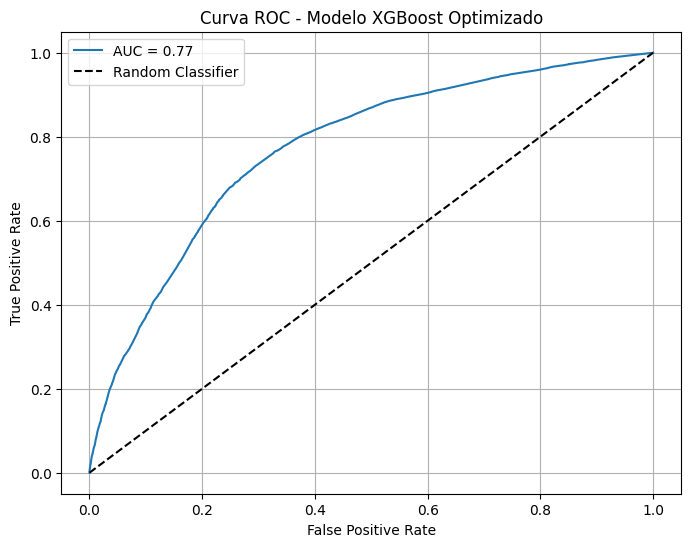

In [ ]:
best_model = grid_search.best_estimator_

# 🔮 Predicciones
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 📊 Evaluación en test set
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# 📈 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo XGBoost Optimizado")
plt.legend()
plt.grid(True)
plt.show()

#oPruebas mas variables


In [8]:
# Agregar variables brutas si están en df original
variables_brutas = [
    'RoundHeadshots',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'TimeAlive'
]

for var in variables_brutas:
    if var in df.columns:
        df_corr[var] = df[var]

# Agregar derivadas
df_corr['CombinedGrenades'] = df_corr['RLethalGrenadesThrown'] + df_corr['RNonLethalGrenadesThrown']
df_corr['HeadshotRate'] = df_corr['RoundHeadshots'] / (df_corr['RoundKills'] + 1)
df_corr['AggroRatio'] = df_corr['RoundKills'] / (df_corr['TimeAlive'] + 1)
df_corr['KillPerUtility'] = df_corr['RoundKills'] / (df_corr['CombinedGrenades'] + 1)

# Rifle binario si tienes PrimaryAssaultRifle en df
if 'PrimaryAssaultRifle' in df.columns:
    df_corr['HasRifle'] = (df['PrimaryAssaultRifle'] == 1).astype(int)

# Convertir booleanos si es necesario
df_corr['RoundWinner'] = df_corr['RoundWinner'].astype(int)
df_corr['Survived'] = df_corr['Survived'].astype(int)


In [ ]:
print(df_corr.columns.tolist())

['RoundWinner', 'PrimaryPistol', 'RoundKills', 'RoundStartingEquipmentValue', 'Survived', 'EconomicStatus', 'RoundHeadshots', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown', 'TimeAlive', 'CombinedGrenades', 'HeadshotRate', 'AggroRatio', 'KillPerUtility', 'HasRifle']


📊 Accuracy: 0.7452339024576985

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77     15581
           1       0.65      0.78      0.71     10541

    accuracy                           0.75     26122
   macro avg       0.74      0.75      0.74     26122
weighted avg       0.76      0.75      0.75     26122


🧱 Confusion Matrix:
 [[11199  4382]
 [ 2273  8268]]

🔢 ROC AUC: 0.8206261459154474


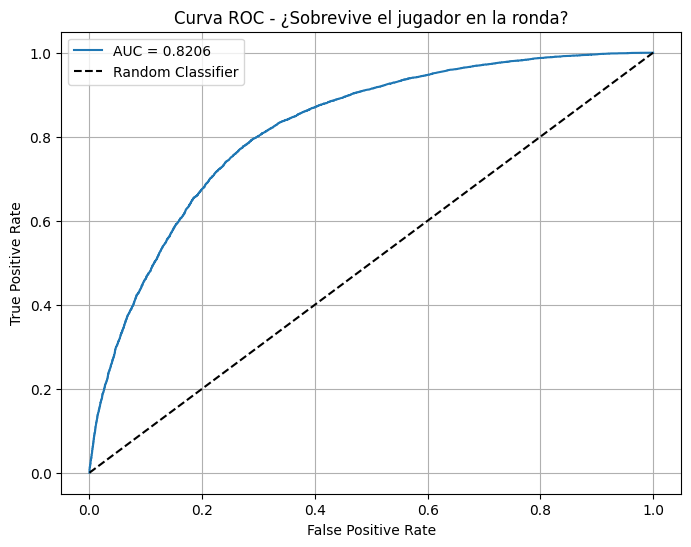

In [ ]:

# 🎯 Variables predictoras y objetivo
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# 🔀 División de datos (con estratificación)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# ⚖️ Calcular peso de clases para balancear
ratio = Counter(y_train)[0] / Counter(y_train)[1]

# 🤖 Modelo XGBoost con parámetros afinados y balance de clases
model = xgb.XGBClassifier(
    eval_metric='logloss',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    colsample_bytree=0.8,
    subsample=0.8,
    scale_pos_weight=ratio,
    random_state=42
)

# 🚀 Entrenamiento
model.fit(X_train, y_train)

# 🔮 Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 📊 Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# 📈 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - ¿Sobrevive el jugador en la ronda?")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install shap

100%|===================| 79099/79157 [15:30<00:00]       

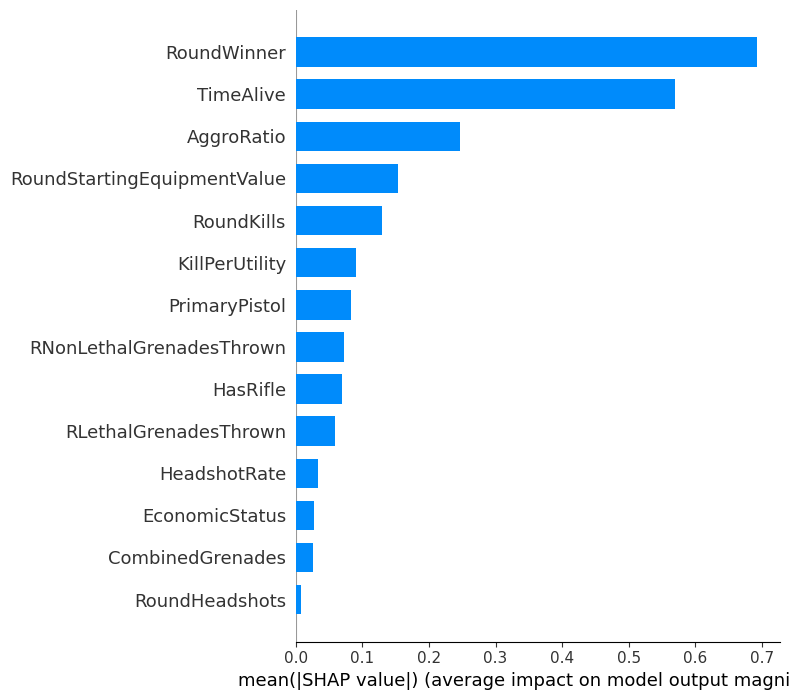

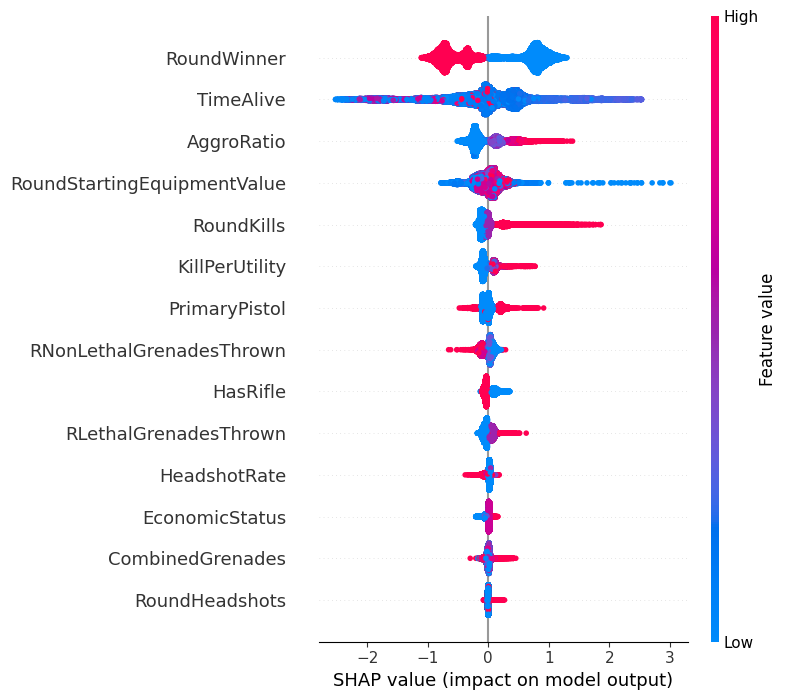

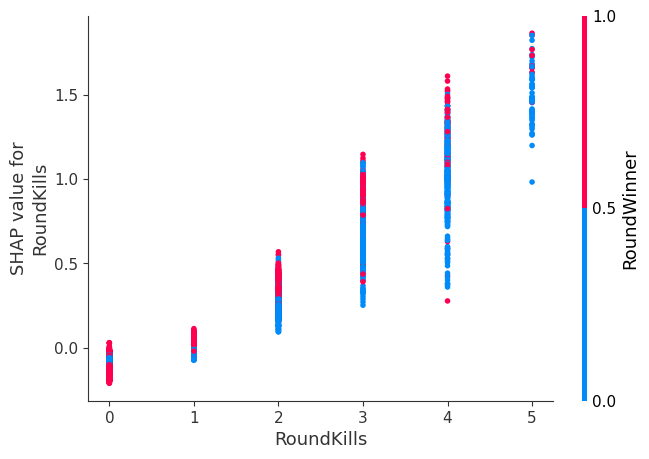

In [ ]:
import shap

# 1. Crear el explainer para XGBoost
explainer = shap.Explainer(model, X)

# 2. Calcular los valores SHAP para el conjunto de datos
shap_values = explainer(X)

# 3. 📊 Resumen global: muestra importancia y dirección de cada feature
shap.summary_plot(shap_values, X, plot_type="bar")

# 4. 🔬 Versión detallada: importancia + dirección (color) por feature
shap.summary_plot(shap_values, X)

# 5. 🔍 Dependencia: cómo influye una variable específica (ej: RoundKills)
shap.dependence_plot("RoundKills", shap_values.values, X)

#Prueba eliminando variables inutiles segun SHAP

In [9]:
# 🔍 Variables seleccionadas según SHAP (mayor impacto)
variables_utiles = [
    'RoundWinner',
    'PrimaryPistol',
    'RoundKills',
    'RoundStartingEquipmentValue',
    'TimeAlive',
    'AggroRatio',
    'KillPerUtility',
    'Survived'  # objetivo
]

# 🧹 Filtrar el DataFrame
df_corr = df_corr[variables_utiles]

# ✔️ Verificación
print("Variables finales en df_corr:", df_corr.columns.tolist())

Variables finales en df_corr: ['RoundWinner', 'PrimaryPistol', 'RoundKills', 'RoundStartingEquipmentValue', 'TimeAlive', 'AggroRatio', 'KillPerUtility', 'Survived']


📊 Accuracy: 0.7467268968685399

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79     15581
           1       0.69      0.69      0.69     10541

    accuracy                           0.75     26122
   macro avg       0.74      0.74      0.74     26122
weighted avg       0.75      0.75      0.75     26122


🧱 Confusion Matrix:
 [[12268  3313]
 [ 3303  7238]]

🔢 ROC AUC: 0.816849136267435


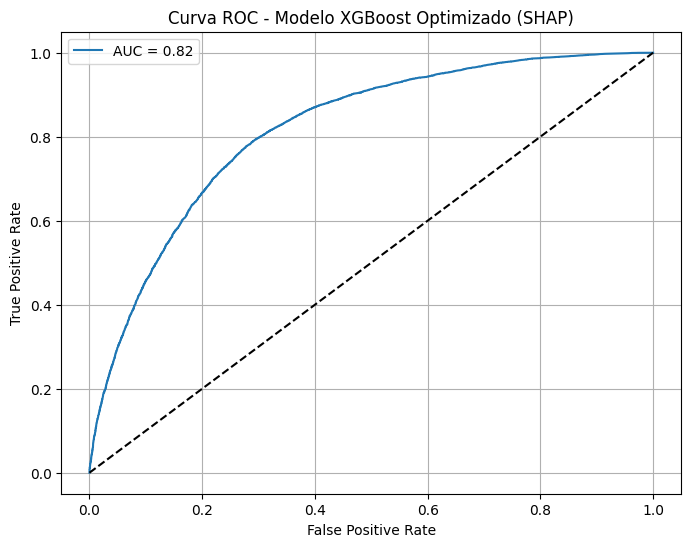

In [ ]:
# ✅ Asegurar que los booleanos sean enteros
df_corr['RoundWinner'] = df_corr['RoundWinner'].astype(int)
df_corr['Survived'] = df_corr['Survived'].astype(int)

# 🎯 Separar variables predictoras y objetivo
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# 🔀 División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 🚀 Definir y entrenar el modelo
model = xgb.XGBClassifier(
    eval_metric='auc',             # usar AUC en vez de logloss
    n_estimators=500,              # más rondas con early stopping
    learning_rate=0.03,
    max_depth=4,
    colsample_bytree=0.7,
    subsample=0.7,
    random_state=42
)
model.fit(X_train, y_train)

# 🔮 Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 📊 Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# 📈 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo XGBoost Optimizado (SHAP)")
plt.legend()
plt.grid(True)
plt.show()

#MobiityScore?

In [10]:
df_corr['MobilityScore'] = df['TravelledDistance'] / (df['TimeAlive'] + 1e-5)

📊 Accuracy: 0.7528137202358166

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79     15581
           1       0.69      0.69      0.69     10541

    accuracy                           0.75     26122
   macro avg       0.74      0.74      0.74     26122
weighted avg       0.75      0.75      0.75     26122


🧱 Confusion Matrix:
 [[12372  3209]
 [ 3248  7293]]

🔢 ROC AUC: 0.8236909722733207


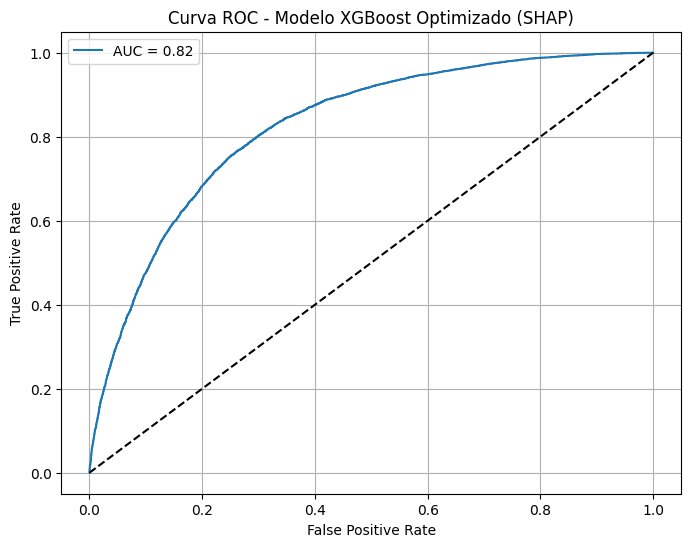

In [ ]:
# ✅ Asegurar que los booleanos sean enteros
df_corr['RoundWinner'] = df_corr['RoundWinner'].astype(int)
df_corr['Survived'] = df_corr['Survived'].astype(int)

# 🎯 Separar variables predictoras y objetivo
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# 🔀 División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 🚀 Definir y entrenar el modelo
model = xgb.XGBClassifier(
    eval_metric='auc',             # usar AUC en vez de logloss
    n_estimators=500,              # más rondas con early stopping
    learning_rate=0.03,
    max_depth=4,
    colsample_bytree=0.7,
    subsample=0.7,
    random_state=42
)
model.fit(X_train, y_train)

# 🔮 Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 📊 Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# 📈 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo XGBoost Optimizado (SHAP)")
plt.legend()
plt.grid(True)
plt.show()

#Otras pruebas


In [11]:
df_corr.drop(columns=['PrimaryPistol', 'KillPerUtility', 'RoundKills'], inplace=True)

📊 Accuracy: 0.7506699333894802

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79     15581
           1       0.69      0.68      0.69     10541

    accuracy                           0.75     26122
   macro avg       0.74      0.74      0.74     26122
weighted avg       0.75      0.75      0.75     26122


🧱 Confusion Matrix:
 [[12416  3165]
 [ 3348  7193]]

🔢 ROC AUC: 0.8223785490442936


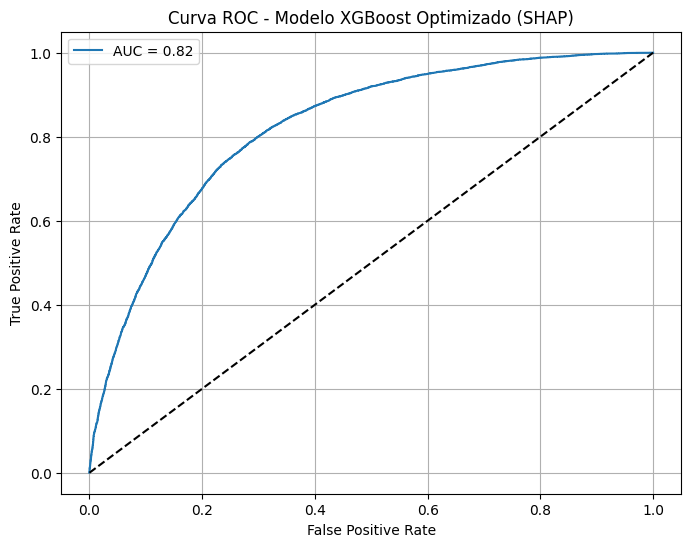

In [12]:
# ✅ Asegurar que los booleanos sean enteros
df_corr['RoundWinner'] = df_corr['RoundWinner'].astype(int)
df_corr['Survived'] = df_corr['Survived'].astype(int)

# 🎯 Separar variables predictoras y objetivo
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# 🔀 División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 🚀 Definir y entrenar el modelo
model = xgb.XGBClassifier(
    eval_metric='auc',             # usar AUC en vez de logloss
    n_estimators=500,              # más rondas con early stopping
    learning_rate=0.03,
    max_depth=4,
    colsample_bytree=0.7,
    subsample=0.7,
    random_state=42
)
model.fit(X_train, y_train)

# 🔮 Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 📊 Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# 📈 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo XGBoost Optimizado (SHAP)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
df_corr.info()
#RoundWinner - TEAM QUE GANO - DATASET
#RoundStartingEquipmentValue - Valor del equipamiento por ronda - DATASET
#TimeAlive - Tiempo vivo - DATASET
# VARIABLE OBJETIVO SURVIVED - DATASET



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RoundWinner                  79157 non-null  int64  
 1   RoundStartingEquipmentValue  79157 non-null  int64  
 2   TimeAlive                    79157 non-null  float64
 3   AggroRatio                   79157 non-null  float64
 4   Survived                     79157 non-null  int64  
 5   RoundKills                   79157 non-null  int64  
 6   RoundAssists                 79157 non-null  int64  
 7   TravelledDistance            79157 non-null  float64
 8   TeamStartingEquipmentValue   79157 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 5.4 MB


In [14]:
df_corr.drop(columns=['MobilityScore'], inplace=True)
df_corr['RoundKills'] = df['RoundKills']
df_corr['RoundAssists'] = df['RoundAssists']
df_corr['TravelledDistance'] = df['TravelledDistance']
df_corr['TeamStartingEquipmentValue'] = df['TeamStartingEquipmentValue']

📊 Accuracy: 0.7596278998545287

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     15581
           1       0.71      0.68      0.70     10541

    accuracy                           0.76     26122
   macro avg       0.75      0.75      0.75     26122
weighted avg       0.76      0.76      0.76     26122


🧱 Confusion Matrix:
 [[12631  2950]
 [ 3329  7212]]

🔢 ROC AUC: 0.831000269417821


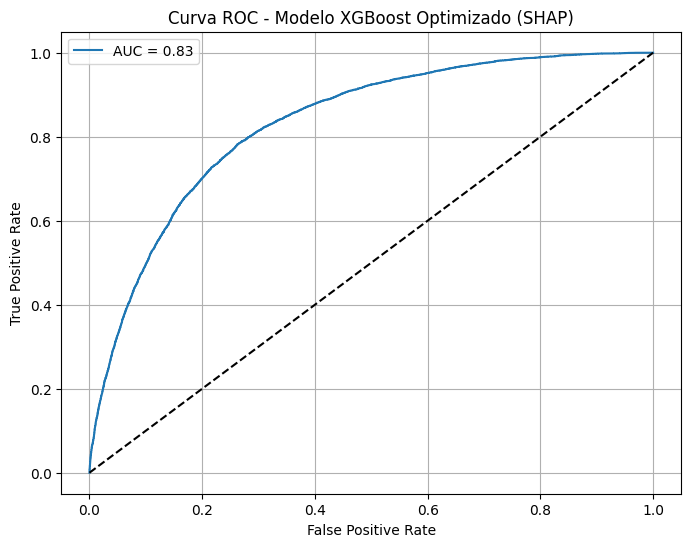

In [ ]:
# ✅ Asegurar que los booleanos sean enteros
df_corr['RoundWinner'] = df_corr['RoundWinner'].astype(int)
df_corr['Survived'] = df_corr['Survived'].astype(int)

# 🎯 Separar variables predictoras y objetivo
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# 🔀 División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 🚀 Definir y entrenar el modelo
model = xgb.XGBClassifier(
    eval_metric='auc',             # usar AUC en vez de logloss
    n_estimators=500,              # más rondas con early stopping
    learning_rate=0.03,
    max_depth=4,
    colsample_bytree=0.7,
    subsample=0.7,
    random_state=42
)
model.fit(X_train, y_train)

# 🔮 Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 📊 Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# 📈 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo XGBoost Optimizado (SHAP)")
plt.legend()
plt.grid(True)
plt.show()

#ENCODING

In [18]:
import pandas as pd

# 🎯 One-hot encoding de Map y Team
map_team_encoded = pd.get_dummies(df[['Map', 'Team']], drop_first=True)

# 🧬 Fusionar con df_corr
df_corr = pd.concat([df_corr, map_team_encoded], axis=1)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:16:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Accuracy: 0.7676288186203201

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     15581
           1       0.72      0.70      0.71     10541

    accuracy                           0.77     26122
   macro avg       0.76      0.76      0.76     26122
weighted avg       0.77      0.77      0.77     26122


🧱 Confusion Matrix:
 [[12712  2869]
 [ 3201  7340]]

🔢 ROC AUC: 0.8394875426938717


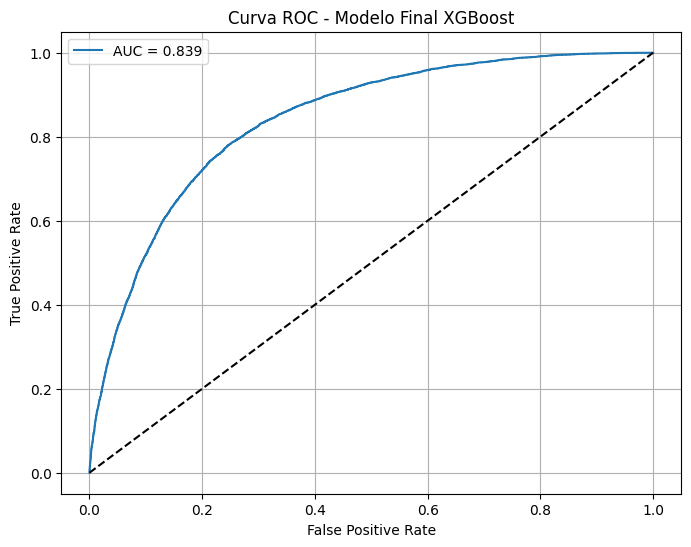

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
import matplotlib.pyplot as plt

# ✅ Asegurar tipos
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')
df_corr = df_corr.dropna()

# 🔀 Variables predictoras y objetivo
X = df_corr.drop(columns=['Survived'])
y = df_corr['Survived']

# 🔀 División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y
)

# 🚀 Modelo XGBoost con hiperparámetros de Optuna
best_xgb = xgb.XGBClassifier(
    n_estimators=605,
    learning_rate=0.07339891096362386,
    max_depth=8,
    subsample=0.8788165294124883,
    colsample_bytree=0.7338675537023565,
    gamma=1.3853865994279237,
    reg_alpha=1.8012023217641078,
    reg_lambda=0.9160295244260447,
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

# 🏋️‍♂️ Entrenar modelo
best_xgb.fit(X_train, y_train)

# 🔮 Predicción
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# 📊 Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# 📈 Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo Final XGBoost")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
from collections import Counter

# Calcular proporción entre clases (Survived = 0 vs 1)
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]
print(f"⚖️ scale_pos_weight: {scale_pos_weight:.3f}")

⚖️ scale_pos_weight: 1.478


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:16:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Accuracy: 0.7662123880254191

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.80     15581
           1       0.69      0.77      0.73     10541

    accuracy                           0.77     26122
   macro avg       0.76      0.77      0.76     26122
weighted avg       0.77      0.77      0.77     26122


🧱 Confusion Matrix:
 [[11884  3697]
 [ 2410  8131]]

🔢 ROC AUC: 0.8401705277386041


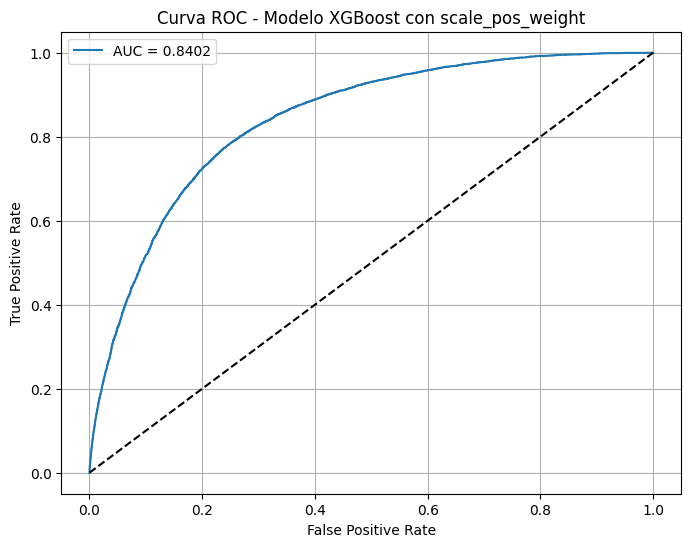

In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Modelo con peso ajustado
model_balanced = xgb.XGBClassifier(
    n_estimators=605,
    learning_rate=0.07339891096362386,
    max_depth=8,
    subsample=0.8788165294124883,
    colsample_bytree=0.7338675537023565,
    gamma=1.3853865994279237,
    reg_alpha=1.8012023217641078,
    reg_lambda=0.9160295244260447,
    scale_pos_weight=scale_pos_weight,  # ✅ APLICADO AQUÍ
    use_label_encoder=False,
    eval_metric='auc',
    random_state=42
)

# Entrenamiento
model_balanced.fit(X_train, y_train)

# Predicciones
y_pred = model_balanced.predict(X_test)
y_proba = model_balanced.predict_proba(X_test)[:, 1]

# Evaluación
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔢 ROC AUC:", roc_auc_score(y_test, y_proba))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Modelo XGBoost con scale_pos_weight")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RoundWinner                  79157 non-null  int64  
 1   RoundStartingEquipmentValue  79157 non-null  int64  
 2   TimeAlive                    79157 non-null  float64
 3   AggroRatio                   79157 non-null  float64
 4   Survived                     79157 non-null  int64  
 5   RoundKills                   79157 non-null  int64  
 6   RoundAssists                 79157 non-null  int64  
 7   TravelledDistance            79157 non-null  float64
 8   TeamStartingEquipmentValue   79157 non-null  int64  
 9   Map_de_inferno               79157 non-null  bool   
 10  Map_de_mirage                79157 non-null  bool   
 11  Map_de_nuke                  79157 non-null  bool   
 12  Team_Terrorist               79157 non-null  bool   
dtypes: bool(4), floa

In [36]:
# Input de ejemplo
input_data = pd.DataFrame([{
    'RoundWinner': 0,
    'RoundStartingEquipmentValue': 15000,
    'TimeAlive': 0,
    'AggroRatio': 1.25,
    'RoundKills': 0,
    'RoundAssists': 1,
    'TravelledDistance': 345.6,
    'TeamStartingEquipmentValue': 65000,
    'Map_de_inferno': False,
    'Map_de_mirage': True,
    'Map_de_nuke': False,
    'Team_Terrorist': True
}])

# Predicción binaria: 0 (no sobrevive) o 1 (sobrevive)
pred_clase = model_balanced.predict(input_data)[0]

# Probabilidad asociada a sobrevivir (clase 1)
pred_proba = model_balanced.predict_proba(input_data)[0][1]

print(f"¿Sobrevive? {'✅ SÍ' if pred_clase == 1 else '❌ NO'}")
print(f"🔢 Probabilidad de sobrevivir: {pred_proba:.4f}")

¿Sobrevive? ❌ NO
🔢 Probabilidad de sobrevivir: 0.3402


In [ ]:
import joblib
# Guardar el modelo
joblib.dump(model_balanced, 'modelo_xgb_survived.pkl')
# Descargar el archivo
files.download('modelo_xgb_survived.pkl')
